# Bank-Marketing data for the classification problem
Our goal here is to predict weather a client make a purchase of (deposit)

# ATAS : Alpha Tech academy
---
## Data Science with python internship
## Task: Predict weather the client is going to make a purchase or not.
### By: Sahil Tomar
---

In [2]:
#Importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Import successful...')

Import successful...


In [3]:
df = pd.read_csv('bank (2).csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


head() function basically gives the first five rows of the dataset by default. If you want to see 'n' rows then just have to type df.head(n).

NOTE: n must be integer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.shape

(11162, 17)

## Shape is giving, total how many rows and columns we have.
## (row, column)
### => we have total 11162 rows and 17 columns

In [6]:
dup_data = df[df.duplicated(keep = 'last')]
dup_data.sum()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

## We do not have the duplicated data.

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

#### by isna() method is showing that there are no missing values in any column.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


### From the above table we can see that we have some outliers in our data in the columns 'campaign', 'pdays' & 'previous'
### we have to check and clean our data.

In [9]:
# Checking for pdays:
'''
'pdays' holds the number of days that passed by after
the client was last contacted from a previous campaign
'''
df['pdays'].describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

### We can see that 50% of the data have value = -1, which is looking like outlier, may be -1 indicate that the person hasn't contacted. In this case we can replace it with mean. Or it may indicate that data is missing. Since we are not sure. We are going to remove the column from dataframe.

In [10]:
# Checking for "campaign":
'''
'campaign' holds the number of contacts performed during this campaign.
'''
len(df[df['campaign'] > 34])/len(df)*100

0.035835871707579285

### we have calculated the campaign contact percentage for this campaign. and we can conclude that the result is looking noisy. so are going to impute them with average campaign values while data cleaning.

In [11]:
# Checking for previous:
'''
'previous' holds the number of contacts performed before this campaign.
'''
df['previous'].describe()

count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64

### we can see that 50% of data is less then 58/2 = 29 days. So we are going to impute the data mean.

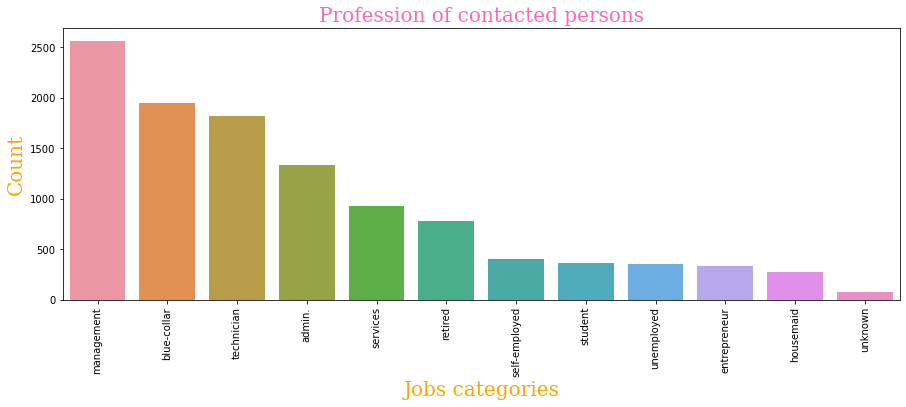

In [12]:
plt.figure(figsize = (15,5))
font1 = {'family':'serif','color':'hotpink','size':20}
font2 = {'family':'serif','color':'orange','size':20}
sns.countplot(x = 'job', data=df, order=df['job'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Profession of contacted persons", fontdict=font1)
plt.xlabel("Jobs categories",fontdict=font2)
plt.ylabel("Count",fontdict=font2)
plt.show()

### Mostly person contacted are belong to: Management, blue-collar, technician, admin and services

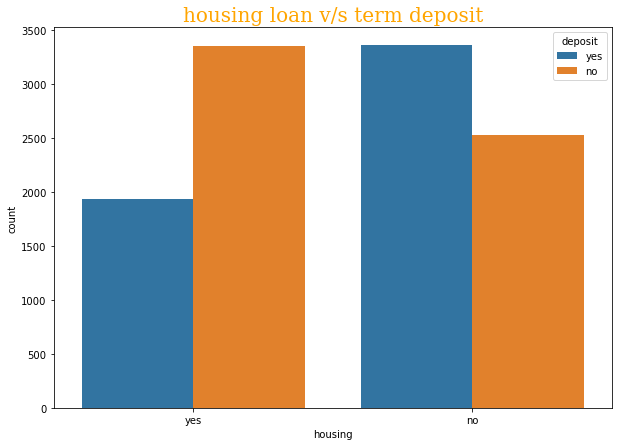

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x='housing', data = df, hue = 'deposit')
plt.title("housing loan v/s term deposit", fontdict=font2)
plt.show()

## From the above graph, we can see that those people which is not having housing loan are likely to make a deposit and those who have the housing loan are not much interested in making a deposit.

Text(0.5, 1.0, 'People having personal loan')

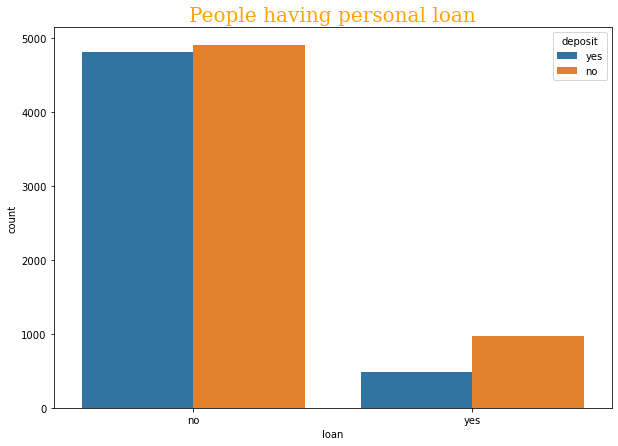

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'loan',
            data=df,
            hue = 'deposit')
plt.title("People having personal loan", fontdict=font2)

## From the above graph, we can see that almost all the customers contacted who do not have the personal loan are interested in making a term deposit.

D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


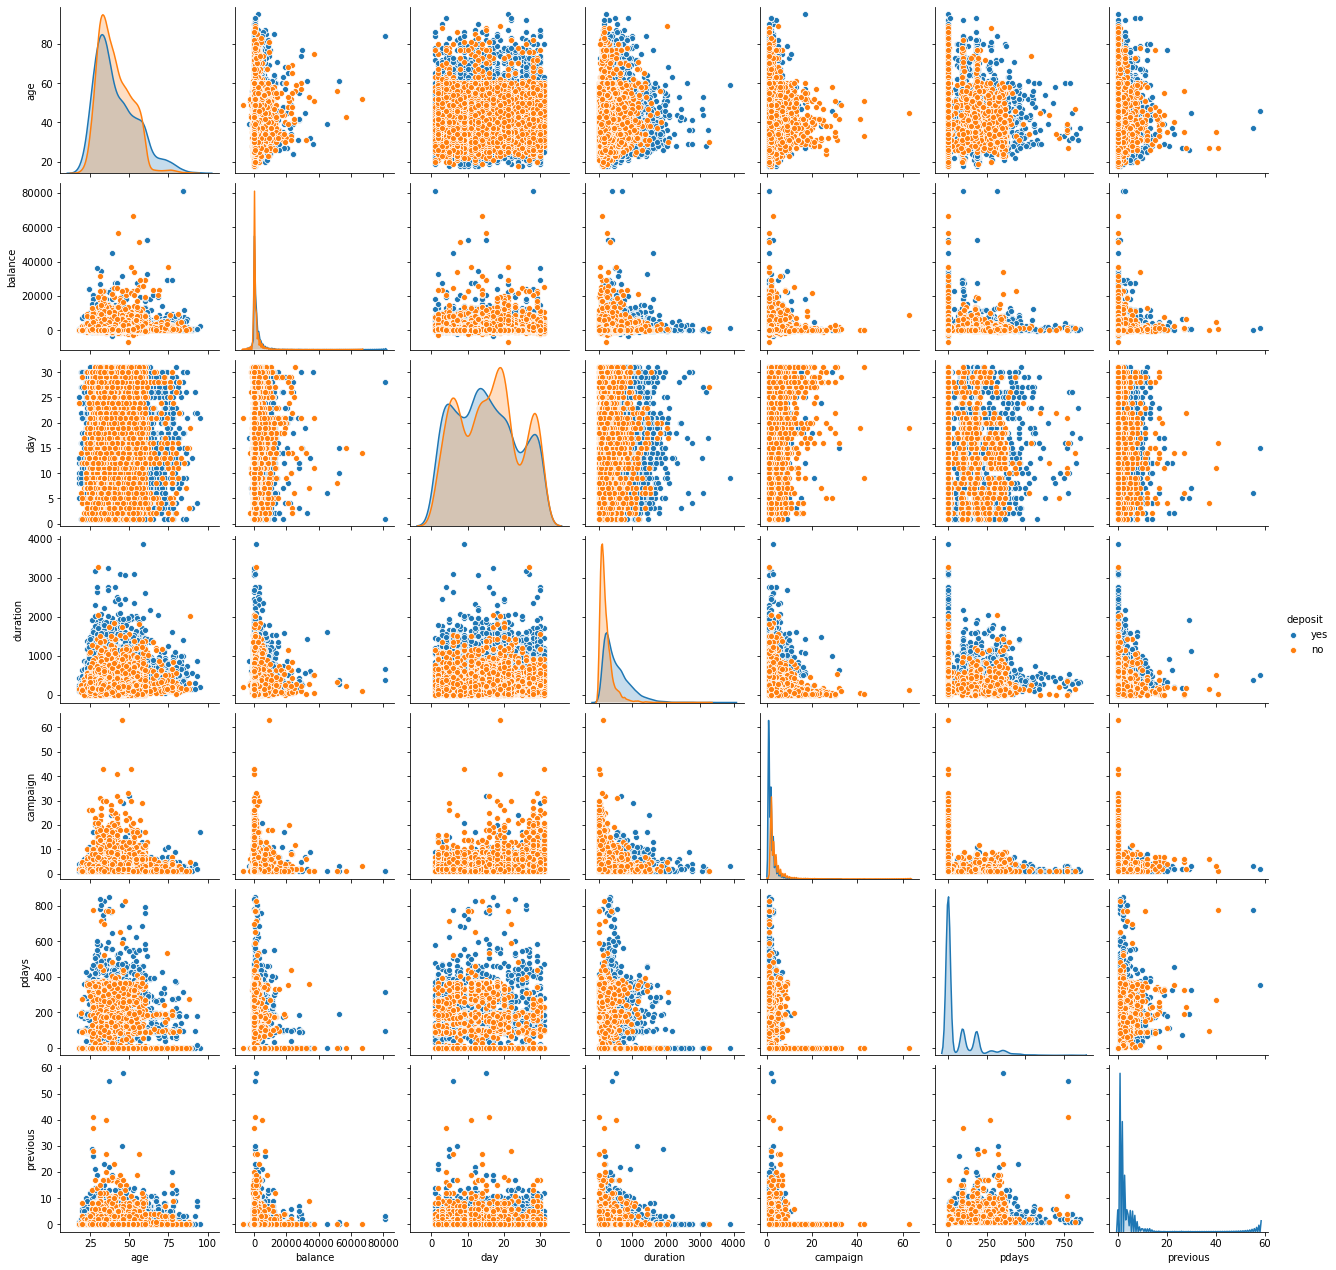

In [15]:
sns.pairplot(df, hue='deposit')

#### The above pairplot I have used to take some insight about how my numerical variables are corelating w.r.t the output variable.

#### By the above bargraph we are able to see that:

People who are contacted the most for the campaign are from: 1. Management, 2. blue-collar, 3. technician, 4. admin, 5. services 
field.

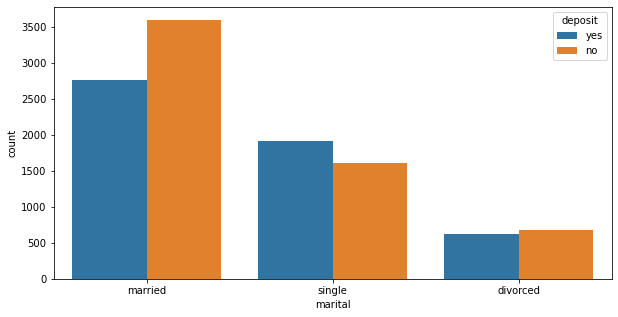

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['marital'], hue = df['deposit'])
plt.show()

#### By the above countplot we can see that mostly the married people are targeted by the company for their campaign.
The below cell's output depict the actual no. of people contacted for the campaign and their percentage w.r.t marital status.

In [17]:
print(df['marital'].value_counts())
print("Client percentage: ",
      ((df['marital'][df['marital'] == 'married'].value_counts())*100)/len(df),
     ((df['marital'][df['marital'] == 'single'].value_counts())*100)/len(df),
     ((df['marital'][df['marital'] == 'divorced'].value_counts())*100)/len(df))

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
Client percentage:  married    56.898405
Name: marital, dtype: float64 single    31.517649
Name: marital, dtype: float64 divorced    11.583946
Name: marital, dtype: float64


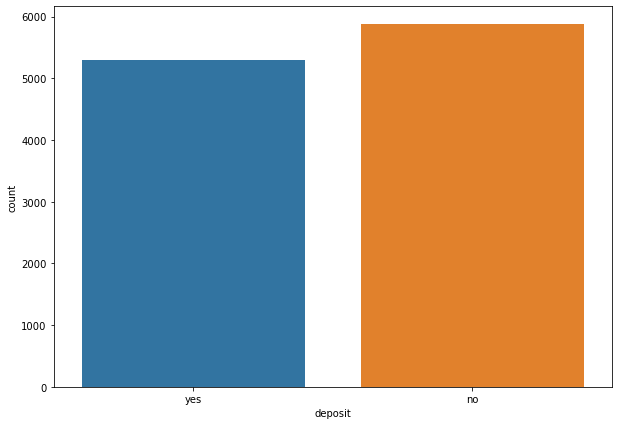

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(df['deposit'])

In [19]:
print("Y = Yes : ", df["deposit"][df["deposit"] == 'yes'].count())
print("Y = No : ", df["deposit"][df["deposit"] == 'no'].count(),"\n")
print(((df["deposit"][df["deposit"] == 'yes'].value_counts())*100)/len(df))
print(((df["deposit"][df["deposit"] == 'no'].value_counts())*100)/len(df))

Y = Yes :  5289
Y = No :  5873 

yes    47.383981
Name: deposit, dtype: float64
no    52.616019
Name: deposit, dtype: float64


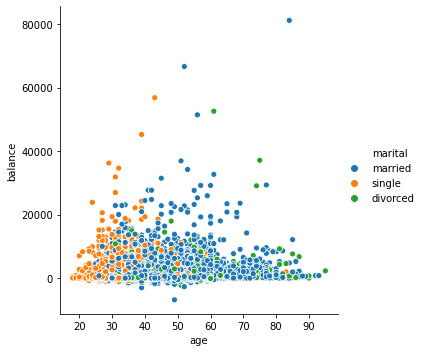

In [20]:
sns.relplot(x = 'age', y = 'balance', hue= 'marital', data = df)

## Insight: Age and balance has no relation

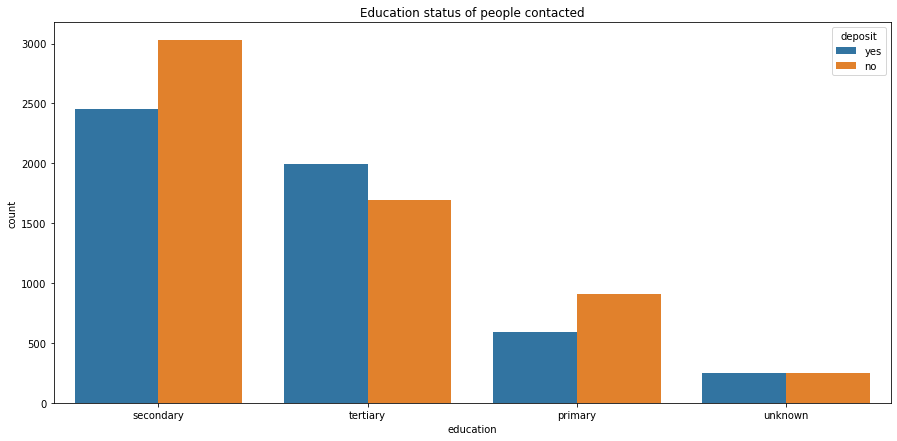

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'education', data = df, hue = 'deposit')
plt.title("Education status of people contacted")
plt.show()

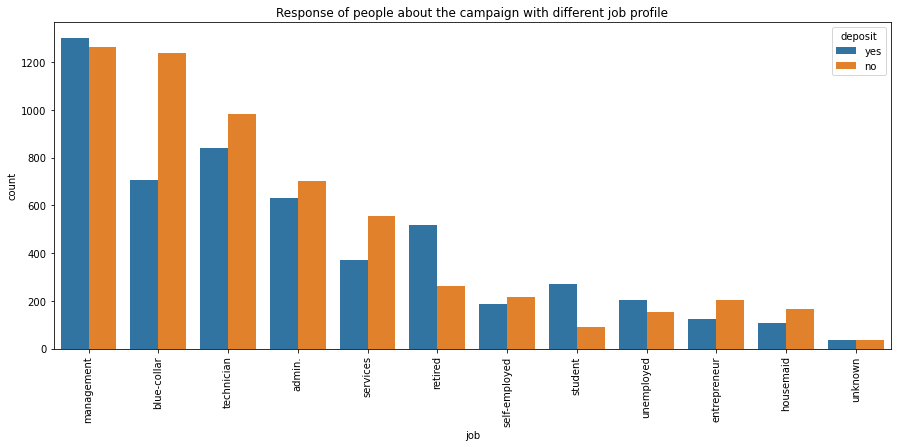

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'job', data = df, hue = 'deposit', order= df['job'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Response of people about the campaign with different job profile")
plt.show()

from the above graph we can see that blue-collar and services people have not interested to make deposit for the campaign.

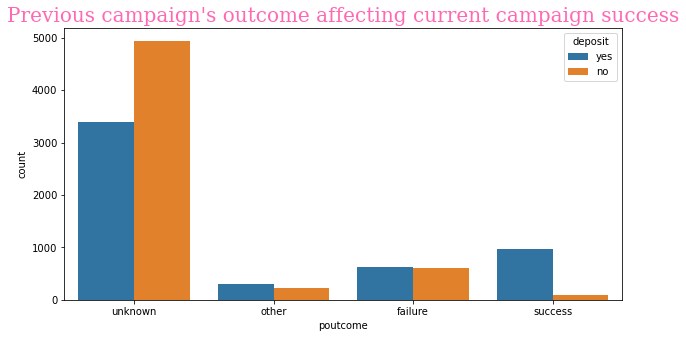

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'poutcome', data = df, hue = 'deposit')
plt.title("Previous campaign's outcome affecting current campaign success", fontdict=font1)
plt.show()

#### The unknown in poutcome has no interest in making the deposit.

In [25]:
df['poutcome'][df['deposit'] == 'yes'].value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

# Data Cleaning:

In [36]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [37]:
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0


In [47]:
#import warning
import warnings as w

#import machine learning
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics


# we don't want to have anywarning message
w.filterwarnings('ignore')

In [48]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=45)

In [56]:
#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)


[22:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
print('XGB accuracy score for \ntrain: %.3f \ntest: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for 
train: 0.910 
test: 0.863


# Thank you!!!